## Final Project Submission

Please fill out:
* Student name: Stephen Kariuki
* Student pace: part time
* Scheduled project review date/time: 07/11/2023
* Instructor name: Evelyne Asiko
* Blog post URL:


<span style="color: black; font-size: 18px;">Business Problem:  </span>  
Microsoft is interested in venturing in the movie production business but they do not have business analysis to help them make informed decisions as to which movies to produce.  
We will provide them with the analysis.

I will do several sets of anlysis then combine the results to make informed propositions to Microsoft.

<span style="color: blue; font-size: 16px;">Tasks</span>

1. Find out which is the most produced genre in the industry.
2. Find out the genre with the highest gross revenue.
3. Find out the genre with the least gross revenue.
4. Investigate the revenue performance for the top produced genres
5. Investigate the revenue performance trend for the top revenue generaters over the years.
6. Investigate the relationship between rating and gross revenue.



In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [5]:
#load data and preview
movie_titles = pd.read_csv('UnzippedData/title.basics.csv')
movie_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#get metadata insights
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB



<span style="color: black; font-size: 18px;">Data clean-up and feature engineering.</span>  
We will analyse the data and decide on how to handle nulls  
We will look at the data formats for the columns we will be analysing  
We will look at the production years and consider the period we'll be analysing


In [73]:
# analysis of missing data by computing the percentage of the missing data
from pandas.core.dtypes import missing
def missingdataanalysis(data):
    count_nulls = data.isna().sum()
    nulls_percentage = (data.isna().sum()) / (len(data))
    column_names = pd.DataFrame({'Missing Values':count_nulls, 'Percentage':nulls_percentage})
    return column_names

In [116]:
missingdataanalysis(movie_titles)

,Missing Values,Percentage
tconst,0,0.000000
primary_title,0,0.000000
original_title,21,0.000144
start_year,0,0.000000
runtime_minutes,31739,0.217176
genres,5408,0.037005




We now begin data clean-up and feature engineering




{'Years represented in dataset': array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)}


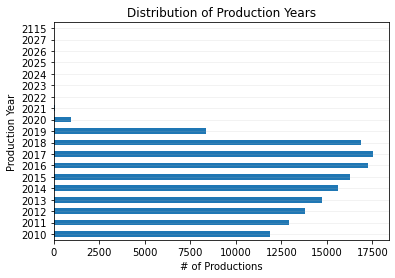

In [117]:
# Investigate the distribution of production years
unique_years = movie_titles['start_year'].unique()
print({'Years represented in dataset':unique_years})
count_of_years = movie_titles['start_year'].value_counts().sort_index()
count_of_years.plot(kind = 'barh')
plt.xlabel('# of Productions')
plt.ylabel('Production Year')
plt.title('Distribution of Production Years')
plt.grid(axis = 'y', alpha = 0.2)
plt.show()

In [175]:
# Filter dataset to exclude future years. My assumption is that the data is generated in 2023.
df = movie_titles[movie_titles['start_year'] <= 2023]
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [176]:
# retain only colums relevant to our analysis.
df = df.drop(['runtime_minutes', 'original_title'], axis = 1)
df.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


'genre' has 5,408 null values which is equivalent to 3.75% .  Due to the nature of our data we cannot impute these values.

We'll drop the null values since dropping nulls which are 3.75% will not significantly affect our dataset.

In [177]:
# Drop genre nulls and confirm drop
df = df.dropna(subset = ['genres'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140731 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         140731 non-null  object
 1   primary_title  140731 non-null  object
 2   start_year     140731 non-null  int64 
 3   genres         140731 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB


<span style="color: blue; font-size: 18px;">Task One: 
    which is the most produced genre in the industry.</span> 

In [131]:
# Top 10 produced movie genres
genre_counts = df['genres'].value_counts().sort_values(ascending = False)[:10]
# genre_counts
df2 = pd.DataFrame(genre_counts)
df2.columns = ['no_of_movies_produced']
df2

,no_of_movies_produced
Documentary,32185
Drama,21485
Comedy,9177
Horror,4372
"Comedy,Drama",3519
Thriller,3046
Action,2219
"Biography,Documentary",2115
"Drama,Romance",2079
"Comedy,Drama,Romance",1558



<span style="color: blue; font-size: 14px;">Task One Answer:
The most produced genre in the industry is 'Documentary</span> 

Now that we know the most produced genre we now know something about the movies in production. This unfortunately is not enough to make recomendations to Microsoft since one metric isn't enough to draw meaningful insights for our case study.

We now move a step further and analyse the relationship between gross revenues and movie genres.




<span style="color: blue; font-size: 18px;">Task Two and Three:
Find out the genre with the highest and least gross revenue</span>   

Here we will require to combine three data sets in order to achieve our subsequent objectives. 

In [7]:
# load tables
title_basics = pd.read_csv('UnzippedData/title.basics.csv')
title_ratings = pd.read_csv('UnzippedData/title.ratings.csv')
bom_movies_gross = pd.read_csv('UnzippedData/bom.movie_gross.csv')




Merge The Tables

The challenge here is that 'title_ratings' and 'title_basics' have a common column. 'title_basics' and 'bom_movies_gross' have a common column. 'title_ratings' and 'bom_movies_gross' do not have a common column to use in concatenating.
In this case we will do the merging in two steps.



In [8]:
title_basics_df1 = pd.DataFrame(title_basics)
title_ratings_df = pd.DataFrame(title_ratings)
bom_movies_gross_df = pd.DataFrame(bom_movies_gross)

# combine first level(two tables)
combined_t1 = pd.merge(title_basics_df1, title_ratings_df, on = 'tconst', how='left')
combined_t1.sample(20)

# Combine second level (combined table and the third table)

combined_t2 = pd.merge(combined_t1, bom_movies_gross_df, left_on='primary_title', right_on='title', how='left')
combined_t2.sample(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
136896,tt8748882,24/25 Il fotogramma in più,24/25 Il fotogramma in più,2018,50.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38531,tt2382596,John Wesley: The Man and His Mission,John Wesley: The Man and His Mission,2012,55.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20970,tt1867539,El Limpiapiscinas,El Limpiapiscinas,2011,92.0,Comedy,3.8,372.0,NaN,NaN,NaN,NaN,NaN
12541,tt1664813,Rasa Yatra,Rasa Yatra,2012,50.0,"Documentary,History",7.6,42.0,NaN,NaN,NaN,NaN,NaN
126492,tt7725692,Murdery Christmas,Murdery Christmas,2018,NaN,"Horror,Thriller",NaN,NaN,NaN,NaN,NaN,NaN,NaN
49023,tt2917742,El hijo de Hernández,El hijo de Hernández,2013,77.0,"Adventure,Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
88971,tt5144202,And on the Seventh Day...,And on the Seventh Day...,2015,62.0,Drama,8.0,6.0,NaN,NaN,NaN,NaN,NaN
120994,tt7287896,Descending Roads,Descending Roads,2015,NaN,"Drama,Family",NaN,NaN,NaN,NaN,NaN,NaN,NaN
120861,tt7279144,Jeerjimbe,Jeerjimbe,2016,126.0,"Drama,Family",6.0,7.0,NaN,NaN,NaN,NaN,NaN
37188,tt2352422,"Briefe aus der Deportation, Französischer Wide...","Briefe aus der Deportation, Französischer Wide...",2012,60.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: black; font-size: 18px;">Start data clean up and feature engineering</span>

In [392]:
# get metadata insights
combined_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146146 entries, 0 to 146145
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146146 non-null  object 
 1   primary_title    146146 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  int64  
 4   runtime_minutes  114407 non-null  float64
 5   genres           140738 non-null  object 
 6   averagerating    73858 non-null   float64
 7   numvotes         73858 non-null   float64
 8   title            3366 non-null    object 
 9   studio           3363 non-null    object 
 10  domestic_gross   3342 non-null    float64
 11  foreign_gross    2043 non-null    object 
 12  year             3366 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 15.6+ MB


In 'domestic_gross', there are nulls and non nulls in 'foreign_gross' in the same row and the same is true for 'foreign_gross'.

We will assume that 'domestic_gross' and 'foreign_gross' are gross revenues and so we will add them to get the total gross revenue.

To accomplish this task we will convert the data type of foreign_gross from object to float64 and also remove the commas that seperate the values.

We'll then create a column 'Total_gross_revenue'. Where there is a null in one of the columns we are adding, we'll take the non null value else we'll add the two values.

I take this approach instead of imputing with zeros because doing so will be challenging in dealing with null gross values.



In [9]:

#convert the data type of foreign_gross from object to float64 and remove commas
combined_t2['foreign_gross'] = combined_t2['foreign_gross'].str.replace(',','', regex=True).astype(float)
# add the domestic_gross revenue and foreign_gross revenue so as to obtain the total gross revenue
combined_t2['Total_gross_revenue'] = np.where((combined_t2['domestic_gross'].isnull()) & 
                                              (combined_t2['foreign_gross'].notnull()),combined_t2['foreign_gross'],
                                             np.where((combined_t2['domestic_gross'].notnull()) & 
                                              (combined_t2['foreign_gross'].isnull()),combined_t2['domestic_gross'],
                                             np.where((combined_t2['domestic_gross'].notnull()) & 
                                              (combined_t2['foreign_gross'].notnull()),combined_t2['domestic_gross']+
                                                     combined_t2['foreign_gross'], None)))
combined_t2['Total_gross_revenue']=combined_t2['Total_gross_revenue'].astype(float)

In [10]:
# remove nulls in the column 'Total_gross_revenue'
filter_sample1 = combined_t2[combined_t2['Total_gross_revenue'].notna()]

# remove nulls in the column 'genres'
filter_sample2 = filter_sample1[filter_sample1['genres'].notna()]

# remove future dates assuming the data was collected in 2023'
filter_sample= filter_sample2[filter_sample2['start_year'] <= 2023]
filter_sample.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,Total_gross_revenue
38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,1100000.0,NaN,2016.0,1100000.0
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,744000.0,8000000.0,2012.0,8744000.0
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013.0,188100000.0
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014.0,53200000.0
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,652300000.0,1019.4,2015.0,652301019.4


In [289]:
# confirm nulls have been removed.
filter_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 38 to 146080
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               3326 non-null   object 
 1   primary_title        3326 non-null   object 
 2   original_title       3326 non-null   object 
 3   start_year           3326 non-null   int64  
 4   runtime_minutes      3185 non-null   float64
 5   genres               3326 non-null   object 
 6   averagerating        3020 non-null   float64
 7   numvotes             3020 non-null   float64
 8   title                3326 non-null   object 
 9   studio               3323 non-null   object 
 10  domestic_gross       3302 non-null   float64
 11  foreign_gross        2016 non-null   float64
 12  year                 3326 non-null   float64
 13  Total_gross_revenue  3326 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 389.8+ KB




Let us now have a view of the top performing genres in compared to the total gross revenue and the bottom performers as well.

This will give Microsoft a quick glance of where to venture and where not to in terms of revenue generation.

.

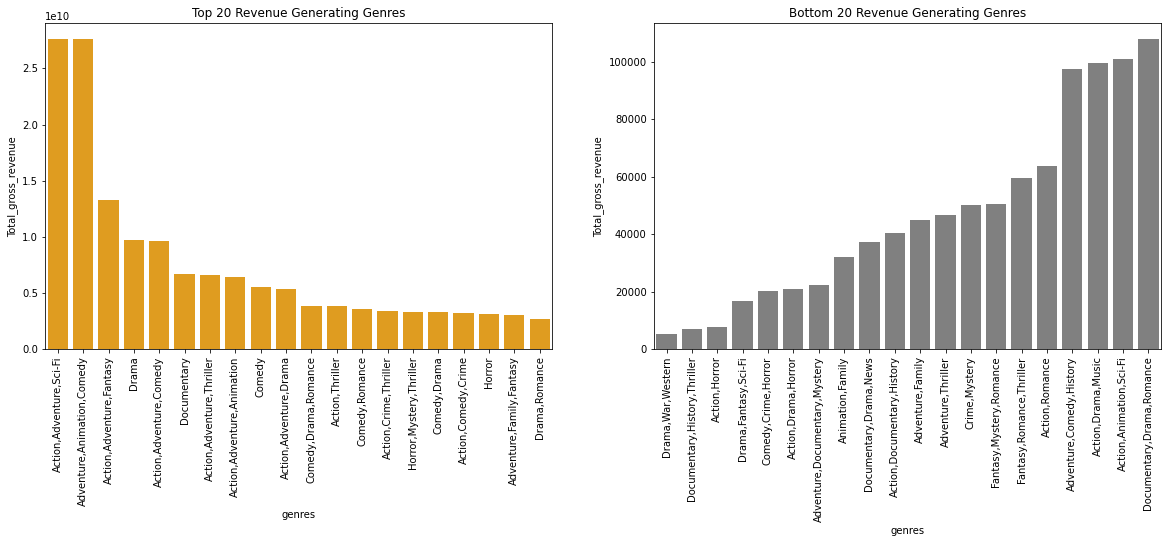

In [11]:
# Gross revenue vs Genre

# calculate the total revenue generated by each genre
grouped_genres = filter_sample.groupby('genres')['Total_gross_revenue'].sum().reset_index()

# Sort by total gross revenue and select the top 20 and bottom 20 genres in terms of total revenue
top_revenue_generators = grouped_genres.nlargest(20, 'Total_gross_revenue')
least_revenue_generators = grouped_genres.nsmallest(20, 'Total_gross_revenue')

fig, axes = plt.subplots(1, 2, figsize = (20, 6))

# plot top revenue generaters
sns.barplot(data=top_revenue_generators, x='genres', y='Total_gross_revenue',color='orange', ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 20 Revenue Generating Genres')

# plot bottom revenue generaters
sns.barplot(data=least_revenue_generators, x='genres', y='Total_gross_revenue',color='grey', ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)
axes[1].set_title('Bottom 20 Revenue Generating Genres')
plt.show()

<span style="color: blue; font-size: 14px;">Task Two Answer:
The genre with the highest gross revenue is 'Action,Adventure,Sci-Fi'</span> 

<span style="color: blue; font-size: 14px;">Task Three Answer:
The genre with the least gross revenue is 'Drama,War,Western'</span> 

In [12]:
grouped_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genres               331 non-null    object 
 1   Total_gross_revenue  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


Let's look at the performance of the top produced genres and compare them with the gross revenue.


<span style="color: blue; font-size: 18px;">Task Four:
Investigate the performance for the top produced genres in relation to the associated gross revenue.</span> 

In [13]:
# create a table for counting the genre frequency
genre_counts = filter_sample['genres'].value_counts().reset_index()
genre_counts.columns = ['genres', 'frequency']
# create a table for adding the gross revenue per genre
genre_revenue = filter_sample.groupby('genres')['Total_gross_revenue'].sum().reset_index()
# merge the two tables and return the top 20 produced genres
top_produced_genre = pd.merge(genre_counts, genre_revenue, on='genres').sort_values(by='frequency', ascending=False)
top_produced_genre[:30]


,genres,frequency,Total_gross_revenue
0,Drama,392,9.750485e+09
1,Documentary,168,6.675822e+09
2,"Comedy,Drama,Romance",138,3.848966e+09
3,"Comedy,Drama",137,3.285812e+09
4,"Drama,Romance",115,2.676497e+09
5,Comedy,112,5.517496e+09
6,"Adventure,Animation,Comedy",75,2.760733e+10
7,"Comedy,Romance",73,3.566841e+09
8,"Drama,Thriller",55,1.762643e+09
10,"Action,Crime,Drama",47,2.197532e+09



Let's plot the visual representation for the top 15 produced genres below



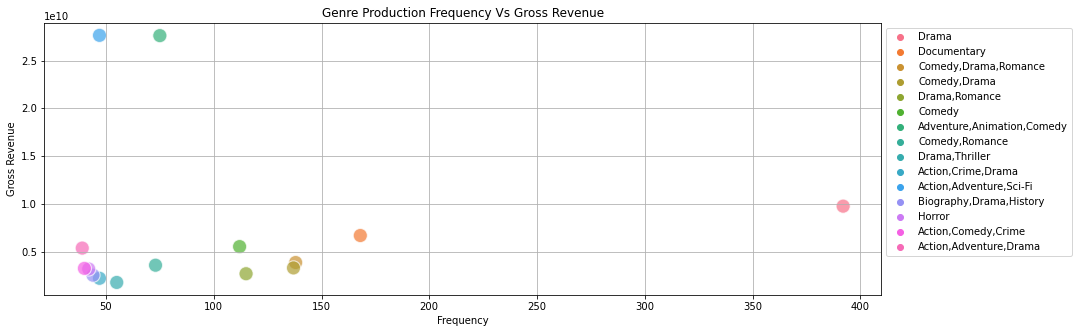

In [350]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=top_produced_genre[:15], x= 'frequency', y='Total_gross_revenue', hue = 'genres', s =200, alpha = 0.7)
plt.title('Genre Production Frequency Vs Gross Revenue')
plt.xlabel('Frequency')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<span style="color: blue; font-size: 14px;">Task Four Answer:
'Drama has the highest frequency'</span> 

It is quite interesting to note that the genre with the highest gross revenue which is 'Action,Adventure,Sci-Fi' isn't the most produced genre. Infact it is number ten in the frequency ranking.

'Drama' which is the most produced ranks 4th in the top 20 revenue generating genres.


<span style="color: blue; font-size: 18px;">Task Five:
Investigate the performance trend for the top revenue generaters over the years.</span> 

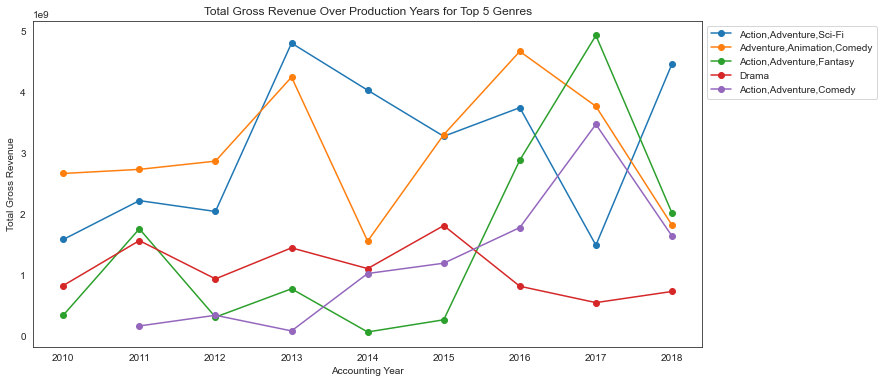

In [416]:

top_5_performers = top_revenue_generators[:5]
top_5_genres = top_5_performers['genres']
filter_data_years = filter_sample[filter_sample['genres'].isin(top_5_genres)].copy()
filter_data_years['year'] = filter_data_years['year'].astype(int)
grouped_data = filter_data_years.groupby(['year', 'genres'])['Total_gross_revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    genre_data = grouped_data[grouped_data['genres'] == genre]
    plt.plot(genre_data['year'], genre_data['Total_gross_revenue'], marker='o', label=genre)

plt.xlabel('Accounting Year')
plt.ylabel('Total Gross Revenue')
plt.title('Total Gross Revenue Over Production Years for Top 5 Genres')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.show()

<span style="color: blue; font-size: 18px;">Task Six:
Investigate the relationship between rating and gross revenue.</span> 

From the 'filter_sample' data, we have 306 nulls which we will drop.


In [418]:
filter_sample.dropna(subset =['averagerating'],inplace = True )
# confirm nulls dropped
filter_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 38 to 146080
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               3020 non-null   object 
 1   primary_title        3020 non-null   object 
 2   original_title       3020 non-null   object 
 3   start_year           3020 non-null   int64  
 4   runtime_minutes      2975 non-null   float64
 5   genres               3020 non-null   object 
 6   averagerating        3020 non-null   float64
 7   numvotes             3020 non-null   float64
 8   title                3020 non-null   object 
 9   studio               3017 non-null   object 
 10  domestic_gross       2998 non-null   float64
 11  foreign_gross        1825 non-null   float64
 12  year                 3020 non-null   float64
 13  Total_gross_revenue  3020 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 353.9+ KB


In [427]:

filter_sample.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,Total_gross_revenue
count,3020.000000,2975.000000,3020.000000,3.020000e+03,2.998000e+03,1.825000e+03,3020.000000,3.020000e+03
mean,2013.784437,107.257815,6.458543,6.184327e+04,3.059426e+07,7.829988e+07,2014.081788,7.768836e+07
std,2.464499,20.048405,1.011853,1.256234e+05,6.676743e+07,1.387958e+08,2.440195,1.729911e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000,1.000000e+02
25%,2012.000000,94.000000,5.900000,2.199000e+03,1.380000e+05,4.600000e+06,2012.000000,3.048250e+05
50%,2014.000000,105.000000,6.600000,1.324900e+04,2.000000e+06,2.110000e+07,2014.000000,6.761850e+06
75%,2016.000000,118.000000,7.100000,6.319075e+04,3.240000e+07,8.160000e+07,2016.000000,6.975000e+07
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09


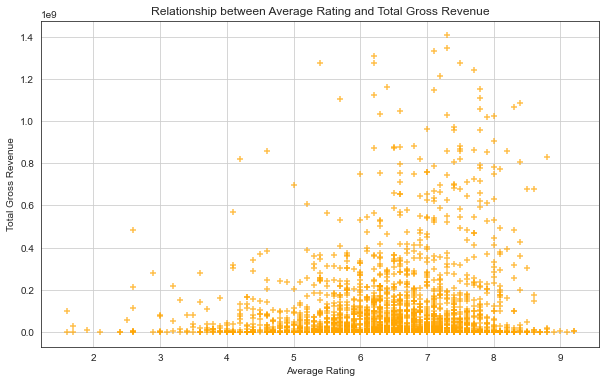

In [420]:
plt.figure(figsize=(10, 6))
plt.scatter(filter_sample['averagerating'], filter_sample['Total_gross_revenue'], color='orange', marker='+', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue')
plt.title('Relationship between Average Rating and Total Gross Revenue')
plt.grid(True)
plt.show()

We can observe that most of the top ranking genres in relation to total gross revenue are within the averagerating 
mean of 6.458543




Let's further investigate the average rating for our top 5 performing genres which were based on total gross revenue

In [425]:
merge_data = top_revenue_generators.merge(filter_sample, on= 'genres', how= 'inner')

average_genre_rating = merge_data.groupby('genres')['averagerating'].mean().reset_index()
average_genre_rating = average_genre_rating.rename(columns= {'averagerating': 'meanrating'})
average_genre_rating

,genres,meanrating
0,"Action,Adventure,Animation",7.354545
1,"Action,Adventure,Comedy",6.271875
2,"Action,Adventure,Drama",6.112821
3,"Action,Adventure,Fantasy",6.287097
4,"Action,Adventure,Sci-Fi",6.776596
5,"Action,Adventure,Thriller",6.476471
6,"Action,Comedy,Crime",5.985000
7,"Action,Crime,Thriller",6.413889
8,"Action,Thriller",6.106452
9,"Adventure,Animation,Comedy",6.438667


<span style="color: blue; font-size: 14px;">Task Six Findings:
</span> 
The averagerating mean is 6.458543
This indicates that our top revenue generators have a mean around the group averagerating mean.
1. Action,Adventure,Sci-Fi with a mean rating of 7.354545
2. Adventure,Animation,Comedy with a mean rating of 6.438667
3. Action,Adventure,Fantasy with a mean rating of 6.287097
4. Drama with a mean rating of 6.672871
5. Action,Adventure,Comedy with a mean rating 6.271875



<span style="color: blue; font-size: 18px;">Conclusion:
</span> 

Microsoft should consider the following when making a decision:

<span style ="font-size: 18px;">1. Based on industry trends:</span>

Produce 'Drama' movies.   
It is the most produced genre and has an average rating of 6.672871 which is above the group average rating of 6.672871.   
It is also important to note that 'Drama' is not the genre with the highest revenue generator, it is ranked 9th.  
  
<span style ="font-size: 18px;">2. Based on total gross revenue:</span>  

Produce 'Action,Adventure,Sci-Fi'  
This is the genre that is generating the highest gross revenue in the industry. It has a mean of 6.776596 which intrestingly is below the group average rating mean.  

<span style ="font-size: 18px;">3. Based on total rating:</span>  

Produce 'Action,Adventure,Animation'.  
This genre has the highest average rating mean of 7.354545.  
This is genre ranked 8th in the total gross revenue rating.  

<span style ="font-size: 18px;">4. Based on gross revenue trends over the accounting period:</span>  

Produce 'Action,Adventure,Sci-Fi'.  
Although all genres project a sawtooth pattern on the line graph, the genre seems to exhibit higher rises than falls and closes the year with a high positive trajectory indicating it has a better revenue growth trend.